In [35]:
from langgraph.graph import StateGraph, START, END
from IPython.display import Image
from typing import TypedDict

In [36]:
class BMI_state(TypedDict):
    weight_kg:float
    height_cm:float
    bmi:float
    category:str

In [37]:
def calcuate_bmi(state: BMI_state) -> BMI_state:
    weight = state['weight_kg']
    height = state['height_cm']
    height = height/100
    bmi = weight/(height**2)
    state['bmi'] = round(bmi,2)

    return state

def label_bmi(state: BMI_state) -> BMI_state:
    bmi = state['bmi']
    if bmi<18.5:
        state['category'] = 'underweight'
    elif 18.5 <= bmi < 25 :
        state['category'] = 'normal'
    elif 25 <= bmi < 30 :
        state['category'] = 'overweight'
    else:
        state['category'] = 'obese'
    
    return state

In [38]:
# define graph
graph = StateGraph(BMI_state)

# add nodes
graph.add_node('calcuate_bmi',calcuate_bmi)
graph.add_node('label_bmi',label_bmi)

# add edges
graph.add_edge(START,'calcuate_bmi')
graph.add_edge('calcuate_bmi','label_bmi')
graph.add_edge('label_bmi',END)

# compile the graph
workflow = graph.compile()

In [39]:
initial_state = {'weight_kg':80, 'height_cm':171}
output_state = workflow.invoke(initial_state)
print(output_state)

{'weight_kg': 80, 'height_cm': 171, 'bmi': 27.36, 'category': 'overweight'}


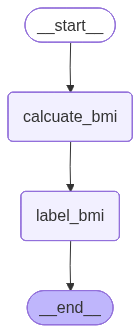

In [40]:
Image(workflow.get_graph().draw_mermaid_png())